In [1]:
%matplotlib widget
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import cvxpy as cp
import pylib.qucf_read as qucf_r
import pylib.measurement as mse

from matplotlib import colors

colors_ = ["blue", "red", "green", "gray", "black"]

29925
/media/work/docs/codes/QuCF/scripts-py


In [23]:
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz
from qutip import Qobj
for i in range(100):
    plt.close()

In [7]:
# coefficients
delta = 2 * np.pi
g = 0.25

# hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

# solve the Lindblad equation
res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

# analytical solution
sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

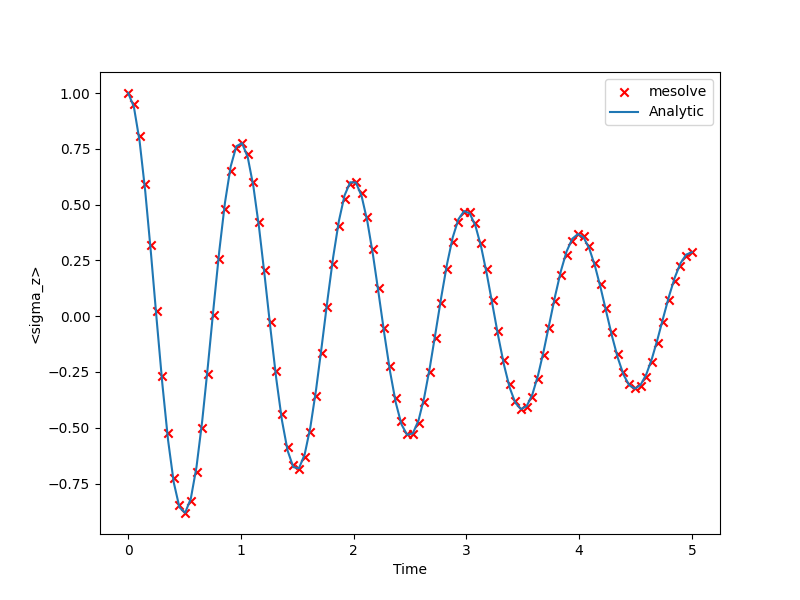

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
ax.plot(tlist, sz_analytic, label="Analytic")
ax.set_xlabel("Time"), plt.ylabel("<sigma_z>")
ax.legend()

In [9]:
H

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.    3.142]
 [3.142 0.   ]]

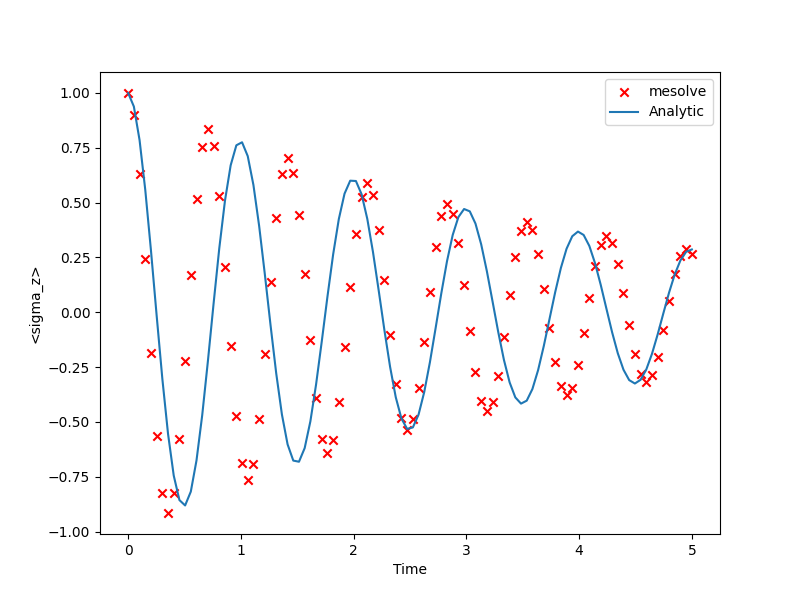

In [24]:
# coefficients
delta = 2 * np.pi
g = 0.25

# hamiltonian
H2 = np.array([
    [0.0,   2.*np.pi],
    [np.pi, 0.0]
])
H2 = Qobj(H2)

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

# solve the Lindblad equation
res = mesolve(H2, psi0, tlist, c_ops, [sigmaz()])

# plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
ax.plot(tlist, sz_analytic, label="Analytic")
ax.set_xlabel("Time"), plt.ylabel("<sigma_z>")
ax.legend()
